<p style="text-align: left;">
 <font size="6"> 
Oceanography: Ocean Tides Problem Set
 </font>
 <font size="5">   
Dr. Guy Evans  
 </font>
 <font size="5">   
[Student Name]  
 </font>
</p>

# 0. Assigment Overview
## 0.1. Tasks
1. Download this problem set and the associated .csv file into your folder for this class (create a new folder if necessary). You will need to download the following files. 
    * OceanTidesProblemSet.ipynb
    * MON-PR-MBYSI2009_1.csv
    * MON-SO-IBYCYSI2009_0.csv
2. Rename this file "OTPS_<Yourname\>.ipynb"
3. Read through the following problem set
4. Run the various code blocks
5. Answer the questions
8. Feel free to ask questions

## 0.2. Purpose
The purpose of this assignment is to: 
* gain a clearer understanding of the **basic properties of waves:**
    - amplitude 
    - wave length / wave number
    - wave period / frequency
    - offset / phase angle
* understanding how waves interact to create **wave interference**
* investigate a dataset of **ocean tides**
* gain exposure to the method of **Fourier Analysis** to separate out dominant frequencies from a complex signal 

## 0.3. Coding Preliminaries
Before we begin, we will start by importing the appropriate libraries:

In [1]:
import math#a library containing basic mathematical functions
import datetime #a library to process date and time information
import numpy as np #a library to perform more advanced numerical calculations
import scipy as sp #a library to perform scientific computing (similar to basic Matlab)
import scipy.fftpack #an extension of scipy to perform Fourier analysis
import pandas as pd #a library to process tabular data.
import matplotlib.pyplot as plt #a library to create plots
%matplotlib inline 

# 1. Introduction
## 1.1. What are waves?
At their most general, **waves** are physical phenomena that can be accurately described by the **wave equation**:  

$${\displaystyle {\partial ^{2}u(x,t) \over \partial t^{2}}=c^{2}{\partial ^{2}u(x,t) \over \partial x^{2}}}\tag{1}$$  
where:  
* $u(x,t)$ is the **shape** of the wave as a function of space ($x$) and time ($t$)
* $\partial ^{2}u \over \partial t^{2}$ is the **curvature** of this shape as a function of time
* $\partial ^{2}u \over \partial x^{2}$ is the **curvature** of this shape as a function of space
* $c$ is the **wave speed**, or *celerity*, which is squared in the equation.  

What do I mean by "**curvature**"? Well, imagine that you are floating in the ocean. As waves pass you, you go up and down. As a wave travels past you, you start to rise upward with the wave. As you reach the top of the wave, you slow down and then stop before moving downward toward the bottom of the wave. At the bottom of the wave, you again slow down and stop before moving back upward. If you were to map out (graph) this motion as a function of time, you could draw a line that slopes upward, curves downward to slow down and slope down, moves down, and then curves upward again. This is a mapping of the wave as a function of time at a fixed point in space. (Please try drawing this out now.) 

Now imagine that, as you are floating in the ocean, you are also looking out at the shapes of the waves around you. This is a mapping of the waves as a function of space at an instant in time. Notice how the shapes of the waves resemble the shape of the curvey line you just drew. You may also know from experience that you can predict whether you are about to go up or go down (and by how much) by looking at the waves coming toward you. You can do this because the wave exhibits a similar shape in both time and space. When the wave curves up at the bottom of the wave, you should expect to go up. When the wave curves down at the top of the wave, you should expect to go down. Thus, the motion of the wave is a function of it's curvature, both as a function of time and as a function of space.

Mathematically, the curvature of the wave is expressed quantitatively as the number result of the second partial derivative, $\partial ^{2} \over \partial x^{2}$ or $\partial ^{2} \over \partial t^{2}$, of the wave function, $u(x,t)$ as a function of space ($x$) or time ($t$). In this case, we are using the symbol $\partial$ rather than the symbol $d$ because these are partial derivatives, which means that the position of the wave is a function of time and space, but we are just taking the (second) derivative with respect to space or time, but not both. The first partial derivative describes the slope of the wave (the change in height as a function of time or space). The second partial derivative describes its curvature (the change in slope as a function of time or space).    

In a practical sense, the second partial derivative represents a change in the slope or gradient of the wave form as a function of space or time. This means that if the wave form is concave up (second derivative is positive) at any given point in time and space, we should expect the wave to be or begin moving in the upward direction. If the wave form is concave down (second derivative is negative), we should expect the wave to be or begin moving in the downward direction. The wave equation also implies that there is a relationship between the shape of the wave in space and the movement of the wave in time, which is governed by the wave speed or *celerity* $c$. If you have been floating in the ocean (or in a wave pool) you already know all of these thing intuitively, if not mathematically.    

In addition to ocean waves, we can use wave forms to describe a wide range of physical phenomena. Wave-like function occur any time something is acting like a spring or something is spinning. Some common examples include:  
* springs
* pendula
* sound waves
* seismic waves
* ocean waves
* internal waves (along the pycnocline)
* chemical bonds
* electromagnetic waves (light)  

* rotational motions
* movements of a point on a spinning wheel  
* changes in daylight as the Earth rotates
* Tidal motions

Ocean waves are controlled by the relationships between:  

1. **Pressure is Controled by Water Surface Height:** The pressure across a horizontal plane within the ocean is a function of the weight of the overlying water. If the ocean surface is uneven (i.e., wavey), then there will be a difference in pressure across this horizontal plane. Higher pressures will occur beneath high points in the ocean surface; lower pressures will occur beneath low points in the ocean surface.  
2. **Movement of Water in Response to Pressure Differences:** Water moves from high pressure to low pressure. Therefore, water beneath a high point in the water surface(high pressure) will move toward a low point in the water surface (low pressure). The rate at which water moves toward a particular point is a function of the curvature of the wave shape at that point. When and where the curvature of the ocean surface is positive (concave up), the pressure is low, water flows into the space, and the ocean surface goes up. When and where the curvature of the ocean surface is negative (concave down), the pressure is high, water flows out of the space, and the ocean surface goes down.  The resulting movement is a wave.   


### 1.1.1. What should I get out of Section 1.1.?
It's totally okay if you don't get most of Section 1.1. It's really here for you edification and reference for possible future learning. The main points are these: 
* Waves are **common physical phenomena** that can be described mathematically.
* Waves typically happen when something is either **acting like a spring** or **rotating**.
* The shape of a wave in space is connected to the movement of a wave in time by the **wave speed**.
* The **direction** of a wave (up or down) is related to the **curvature** of the wave (concave up or concave down).

## 1.2. Waves as sines and cosines
One common solution to the (one-dimensional) wave equation (Eq. 5) is:  
$$u(x) = a\space sin\left(2\pi\left(\frac{x+\Delta x}{\lambda}\right)\right)\tag{2}$$  
where $a$ is the amplitude, $sin(\space)$ is the sine function, $\lambda$ is the wave length, and $\Delta x$ is the offset (in space).  
* The amplitude ($a$) tells you how high the wave is measured from 0. This is one half the wave height.  
* The wavelength ($\lambda$) tells you how long the wave is.  
* The offset ($\Delta x$) tells you at what position in x to start the wave.

Because a cosine function is just a sine function shifted by a quarter wavelength or $\lambda/4$, i.e.,  
$$cos(x) = sin\left(x + \frac{\lambda}{4}\right)\tag{3}$$  

and $\Delta x$ can be any value, the cosine version of Eq. 2 is also a solution to the wave equation.  

$$u(x) = a\space cos\left(2\pi\left(\frac{x+\Delta x}{\lambda}\right)\right)\tag{4}$$  
 

Because these waves are only functions of space, this is just showing the static form of a wave. If we want the wave to move, we need to put time (t) into the equation:

$$u(x,t) = a\space sin\left(2\pi\left(\frac{x+\Delta x-ct}{\lambda}\right)\right)\tag{5}$$  
where $c$ is the celerity or wave speed and $t$ is time.  

It is also possible to remove energy from the wave by dampening it over time (or space).

$$u(x,t) = ae^{-\gamma t} \space sin\left(2\pi\left(\frac{x+\Delta x-ct}{\lambda}\right)\right)\tag{6}$$  

The frequency of this wave ($f$), or how many waves pass a fixed point in a given period of time may be calculated:  
$$ f = \frac{c}{\lambda}\tag{7}$$  
Please note that the diimensionality of frequency is $\frac{1}{time}$ with the corresponding SI base units of $\frac{1}{s}$, or $s^{-1}$.  
For convenience, we often express frequncy using the unit Herz ($1 \space Hz = 1 \space s^{-1}$).  

### 1.2.1. What should I get out of Section 1.2.?
* One type of wave is made up of **sines and cosines**.
* We can use combinations of sine functions to describe a wave.
* Sine waves have several parameters that define their behavior. These include: amplitude, wavelength, and offset.
* When thinking about the movement of waves, we also have to consider the wave speed.

## 1.3. Adding sines and cosines  
If you **add two or more solutions to the wave equation** together, you get another solution to the wave equation. Hence, when trying to calculate the impact of two or more waves acting simultaneously on a surface, it is possible to just **add them together**. 

## 1.4. Wave interference
When two waves interact, they can either move material in the same direction or in opposite direction at a given point in space and time. Either way, we call this additive interaction **interference**. **Positive interference** occurs when waves move material in the same direction and the amplitude of the resultant wave is thus larger than the amplitudes of the two or more component waves. **Negative interference** occurs when waves move material in the opposite direction and the amplitude of the resultant wave is this smaller than the amplitudes of the two or more component waves.  

Adding many waves together can lead to **complex waveforms**. In fact, it is theoretically possible to recreate an arbitrary segment of any smooth function of x using a combination of sine waves of varying amplitudes, frequencies, and offsets. This is often a good idea if the underlying processes consist of wave-generating phenomena and often a bad idea if they do not.

### 1.4.1. Interactive Excercise
To get a better sense of:
* how wave equations translate to wave shapes,
* how different parameters affect the shapes of waves,
* how waves interfere,  

we will plot two waves (in red and blue) and their sum (in black). You can then change the:
* amplitude
* wavelength
* offset 

to see how things change.  

To keep things as simple and intuitive as possible, we will be looking at the behavior of a wave as a function of time at a fixed point in space. Convenently, the real-world data tide set we will be looking at later will also be looking at variations in time at a given place. The formulas for these two waves are as follows:  

$$wave 1 = a_1\space sin\left(2\pi f_1(t+\Delta t_1)\right)\tag{8}$$  
where: 
* $a_1$ is the **amplitude** of wave 1 or the distance from the top of the wave to the surface of zero potential. This is equal to half the **wave height** measured from the top of the wave to the bottom of the wave.   
* $f_1$ is the **frequency** of wave 2 or the number of waves per second measured in $s^{-1}$ ($1 \space s^{-1} = 1 \space Herz$)  
* $\Delta t_1$ is the **time offset** of wave 1 measured in seconds. This determines when the wave should start. The time offset is analagous to the phase angle but more intuitive as a wave with a time offset of 1 s occurs 1 s after a wave with a time offset of 0.  

The equation for wave two is:  
$$wave 2 = a_2\space sin\left(2\pi f_2(t+\Delta t_2)\right)\tag{9}$$ 
 
Wave 3, which is the interference pattern of wave 1 and wave 3 is calculated as follows:  
$$wave 3 = wave 1+ wave 2$$  
$$wave 3=  a_1\space sin\left(2\pi f_1(t+\Delta t_1)\right) + a_2\space sin\left(2\pi f_2(t+\Delta t_1)\right)\tag{10}$$ 

In [60]:
pi=math.pi
#Parameters for wave 1
wave1_a = 10 #amplitude (meters)
wave1_frequency = 8.1 #frequency (s^-1)
wave1_offset = 0 # offest (seconds)

#Parameters for wave 2
wave2_a = 9 #amplitude (meters)
wave2_frequency = 4 #frequency (s^-1)
wave2_offset = 0.4 # offest (seconds)

<function matplotlib.pyplot.show(*args, **kw)>

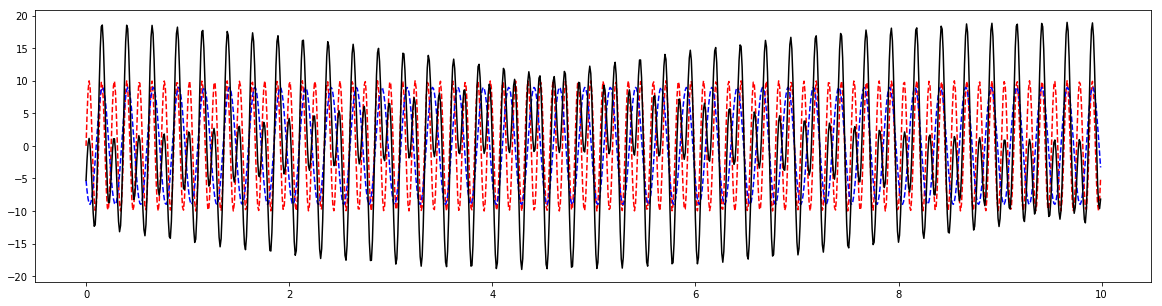

In [62]:
t = np.arange(0, 10, 0.01)
wave1 = wave1_a*np.sin(2*pi*(t+wave1_offset)*wave1_frequency)
wave2 = wave2_a*np.sin(2*pi*(t+wave2_offset)*wave2_frequency)
wave3=wave1+wave2
plt.figure(figsize=(20,5))
plt.plot(t,wave1,'r--',t,wave2,'b--',t,wave3,'k')
plt.show

# Questions for Section 1
1. What are the main points of Section 1.1.?
2. In Section 1.1., we learn that water moves in response to pressure differences and that the motion of a wave is determined by its curvature. Now, imagine a water surface of constant slope such that the curvature (second partial derivative) equals 0. Given that the pressure will be higher where the water surface is higher, how do you expect the water to move in this situation? (Assume that there is an infinite source of water available to maintain the slope). How would you expect the water depth to change over time at any given point in space?
3. What are the main points of Section 1.2.?
4. In your own words, how does wave interferences work?
5. Experiment: Using the code blocks above, change the parameters (amplitude, frequency, and offset) associated with wave 1 and wave 2. Making reference to the phenomenon of wave interference, report how wave 1 and wave 2 interact under the following conditions:  

* Same frequency, same amplitude, different offset (see if you can maximize and minimize the amplitude of wave 3)  
* Same frequency, different amplitude, different offset
* Close to the same frequency, same amplitude
* Wave 1 close to double the frequency of wave 1, vary the amplitudes  
6. Visit the [NOAA Tide Predictions website](https://tidesandcurrents.noaa.gov/tide_predictions.html) and look up tides for Boston (MA), Mobile (AL), and Seattle (WA). What is the tidal range and tidal period for each of these location? Now, adjust the axes of the graph to show data for the entire month. You can do this by clicking "Plot Calendar" or by choosing a range of days (< 31 days) and clicking "Plot Daily". Are tides in each of these locations diurnal, semidiurnal or mixed? Based on your experiments in Question 5, how could these different tide signals be the result of the same driving forces? 

# Instructor feedback on Section 1
Question 1:  
Question 2:  
Question 3:  
Question 4:  
Question 5:  
Question 6:  

## 2. Tides are waves caused by differences in gravity  
Tides are a type of **forced wave** that occurs because water at the Earth's surface is gravitationally attracted to the moon or the sun. All objects with mass are gravitationally attracted to each other by a force:  
$$F_g = G\frac{m_1\cdot m_2}{d^2} \tag{11}$$  
where $F_g$ is the gravitational force, $G$ is the universal gravitational constant ($G = 6.67408 × 10^{-11} \frac{m^3}{kg\cdot s^2}$), $m_1$ and $m_2$ are the masses of the two objects, and $d$ is the distance between the two objects. Because of Newton's second law of motion:  
$$F=ma\tag{12}$$  
where $F$ is the net force acting on a object, $m$ is the mass of the object, and $a$ is the acceleration of the object (change in speed or direction of motion as a function of time), the gravitational force can also be conceptualized as an acceleration acting on one of the objects (i.e. the acceleration that the object would exhibit if gravity were the only force acting on the object is that of gravity:  
$$a_g = G\frac{m_1}{d^2} \tag{13}$$  
where $a_g$ is the acceleration due to gravity.  

In this formulation, the acceleration is only dependent on the mass of the other object and the distance between to two objects. In the case of tides, this would mean the mass of the moon/sun and the distance from the center or surface of the Earth to these objects. 

Because water at the Earth's surface is alternately closer or farther away to the moon/sun than the center of the Earth, the gravitational acceleration of water at the Earth's surface will be alternately greater or less than that of the center of the Earth (greater when closer, less when farther away). Because the **tidal acceleration** is the **difference in the gravitational acceleration** with respect to a small change in distance ($\Delta r$) and not the gravitational acceleration itself, the tidal acceleration is inversely propotional to the distance **cubed** ($d^3$), whereas the gravitational acceleration is inversely propotional to the distance squared ($d^2$):

$$a_{tidal} \approx 2\Delta r G\frac{m}{d^3}\tag{14}$$  

In actual fact, tides are a type of forced wave that are timed to the relative positions of the Earth, moon, and sun. The relative positions of the moon and sun with respect to the Earth first and foremost reflect the rotation of the Earth, but also reflect the revolutions of the moon around the Earth and the Earth around the sun. Hence, while the dominant frequancies of tides are close to 12 and 24 hours, there is a small remainder that will cause the timing and magnitude of high and low tides to vary throughout the lunar month (i.e. one full rotation of the moon about the Earth).  

In general, tides may be conceptualized as a type of rotary wave swirling around an ocean basin in time with the Earth's rotation (similar to how one might swirl water around a shallow dish, cup, or wine glass depending on one's mood and disposition). That said, the exact behavoir of tides as they approach the shore (and enter bays and estuaries) will be very much dependent on the shape of the coastline and coastal waters.  

Here is a link for a [scientific paper](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2011JC007054) presenting model of local tides in the Gulf of Maine and Nantucket Sounds. The [website](http://fvcom.smast.umassd.edu/research_projects/GB/tidal_simulation.html) of the relvant lab at UMASS Darthmouth includes some nice animations of the same models. 

# Questions for Section 2
1. Look up the mass of the sun and the moon, the distance between the Earth and the moon, and the distance between the Earth and the sun. Based on these numbers, please calculate the gravitational and tidal acceleration associated with the moon and the sun at the Earth surface. Which is more important in terms of gravitational acceleration, the moon or the sun? What about for tidal acceleration? How do these accelerations compare with the gravitaional acceleration of Earth at the Earth's surface? Remember to show your work.  
2. What do your answers to question 1 suggest about the behavior of tides in relation to the positions of the Earth, Moon, and Sun?  

# Instructor feedback on Section 2
Question 1:  

# 3. Tides Data
## 3.1. Plum Island Sound
This problem set explores [data](https://pie-lter.ecosystems.mbl.edu/data) from the [Plum Island Ecosystems LTER](https://pie-lter.ecosystems.mbl.edu/welcome-plum-island-ecosystems-lter). The Plum Island Ecosystems LTER is a [Long Term Ecological Research (LTER)](https://lternet.edu/) center located in **Plum Island Sound** in Northeastern Massachusetts, near the towns of Ipswich, Rowley, and Newbury. Plum Island Sound is a **tidal estuary** and **tide marsh** ecosystem, meaning that water levels and the associated movements of dissolved ions, nutrients, gases, and  organisms are stongly influenced by the ocean tides coming off the Gulf of Maine. Tide marsh ecosystems are important nursuries for many marine species and important coastal habitats. However, many tide marshes, including those locally, are under threat from human activities and development. In part, this is because humans tend to undervalue marsh ecosystems as mosquito-infested swampland. To this, I would like to refer you to the first line of the New York times best-selling book **_Where the Crawdads Sing_** by Delia Owens which states quite emphatically if somewhat enigmatically, "**Marsh is not swamp.**" Owens goes on to write that "true swamp" occurs in the marsh but the basic point is that there's a lot more to the marsh than "swamp" and even the swampy bits serve important ecological and, in the case of the book, cultural, emotional, and literary purposes.

## 3.2. Measurement Stations in Plum Island Sound 
As a long term ecological research center, there are numerous studies, experiments, and measurement stations located in the Plum Island Ecosystems LTER. Here is a link to a map of some of their [locations](https://pie-lter.ecosystems.mbl.edu/estuary-water-column-map). Among these measurement stations are several [water level stations](https://pie-lter.ecosystems.mbl.edu/content/pie-lter-water-level-stations) located along the main channel of Plum Island Sound and the Parker River. We will be examining data from two of these stations, an **upstream station** located at the bridge where Middle Road in Newbury crosses the Parker River and a **downstream station** located at the Ipswich Bay Yacht Club on the main channel of Plum Island Sound. At each of these stations, a YSI water quality sonde (6600) measures the:
* Time
* Water Level
* Temperature
* Conductivity
* Salinity
* Dissolved Oxygen Concentration
* Dissolved Oxygen Saturation

## 3.3. Inspecting the Data  
We will start by looking at the data from the bridge on Middle Road over the Parker River. To keep things simple, we will refer to this as the "upstream site". To start, we need to:  
1. Import the appropriate libraries. (which we did at the top of the problem set) 

We will then:  
2. Locate the file with the data from the upstream site.  
3. Import the data.  
4. Check to see that we successfully imported the data.  

We will also want to:  
5. Investigate the size and shape of this dataset.
6. Investigate the start and end of this dataset.

In [4]:
Upstream_file_loc = 'MON-PR-MBYSI2009_1.csv'
Upstream_data = pd.read_csv(Upstream_file_loc,
                 parse_dates=[['Date','Time']])#This lets the computer know to expect dates in these columns
Upstream_data.head(3)

,Date_Time,Station,Temp,SpCond,Cond,Salinity,ODO%YSI,ODO%Local,ODO Conc,Measured Depth,Depth Offset,Measured BAR,Corrected Depth,Comments
0,2009-05-12 16:15:32,MiddleRd,17.91,1.080,0.934,0.54,93.0,92.3,8.79,2.214,0.0816,1021,2.217,YSI 6600 sonde redeployed for 2009 season
1,2009-05-12 16:30:32,MiddleRd,17.97,0.891,0.771,0.44,93.0,92.3,8.79,2.111,0.0816,1021,2.114,NaN
2,2009-05-12 16:45:32,MiddleRd,18.02,0.750,0.650,0.37,93.5,92.8,8.83,2.002,0.0816,1022,1.994,NaN


In [5]:
Upstream_data.size

261842

In [6]:
Upstream_data.shape

(18703, 14)

In [7]:
Upstream_data.tail(3)

,Date_Time,Station,Temp,SpCond,Cond,Salinity,ODO%YSI,ODO%Local,ODO Conc,Measured Depth,Depth Offset,Measured BAR,Corrected Depth,Comments
18700,2009-11-23 11:15:32,MiddleRd,6.71,0.271,0.177,0.13,93.7,92.5,11.45,1.167,0.0,1033,0.966,NaN
18701,2009-11-23 11:30:32,MiddleRd,6.76,0.275,0.179,0.13,93.8,92.6,11.45,1.273,0.0,1033,1.072,NaN
18702,2009-11-23 11:45:32,MiddleRd,6.75,0.279,0.182,0.13,93.9,92.7,11.46,1.378,0.0,1033,1.177,YSI 6600 sonde removed for Winter season


Based on the above results, we see that this dataset has **261842** data points arranged into **18703 rows** and **14 columns**. By looking at the beginning and end of the time column, we can also see that this data set contains measurements collected every 15 minutes from the beginning of May to the end of November 2009. While this is a much larger data set than we've been dealing with so far, this still isn't a huge amount of data from the perspective of most computers. However, you might start to understand the advantages of this program over perhaps Excel (try scrolling through 18000-odd rows in Excel). 

We will now use the same procedure to import the downstream data set.

In [8]:
Downstream_file_loc = 'MON-SO-IBYCYSI2009_0.csv'
Downstream_data = pd.read_csv(Downstream_file_loc,
                 parse_dates=[['Date','Time']])#This lets the computer know to expect dates in these columns
Downstream_data.head(3)

,Date_Time,Station,Temp,SpCond,Cond,Salinity,ODO%YSI,ODO%Local,ODO Conc,Depth,Comments
0,2009-03-31 13:45:00,IBYC,5.33,42.43,26.48,26.8,106.0,105.2,11.24,2.555,Sonde reinstalled after Winter season
1,2009-03-31 14:00:00,IBYC,5.35,42.63,26.63,26.9,106.5,105.7,11.27,2.671,NaN
2,2009-03-31 14:15:00,IBYC,5.32,42.79,26.70,27.0,106.8,106.0,11.30,2.757,NaN


## 3.4. Plotting the data
At this point, we could go right ahead and **plot this dataset**. In this case, we will plot the corrected depth as a function of time. The corrected depth is the measured depth corrected for the depth of the YSI water quality sonde to get the true depth of the water. We may also want to **limit the scale** of the x-axis to investigate different time periods. For example, we may want to just look at just the data for one day or for one month, or for the whole period. You can change this scale by changing the values below for **plot_start_time** and **plot_end_time**. Remember, the data was collected from May 2009 to November 2009. So, you will likely want to scale your x-axis to fall somewhere in this range.

In [9]:
plot_start_time=datetime.date(2009, 8, 1)
plot_end_time=datetime.date(2009, 9, 1)

(733620.0, 733651.0)

<Figure size 432x288 with 0 Axes>

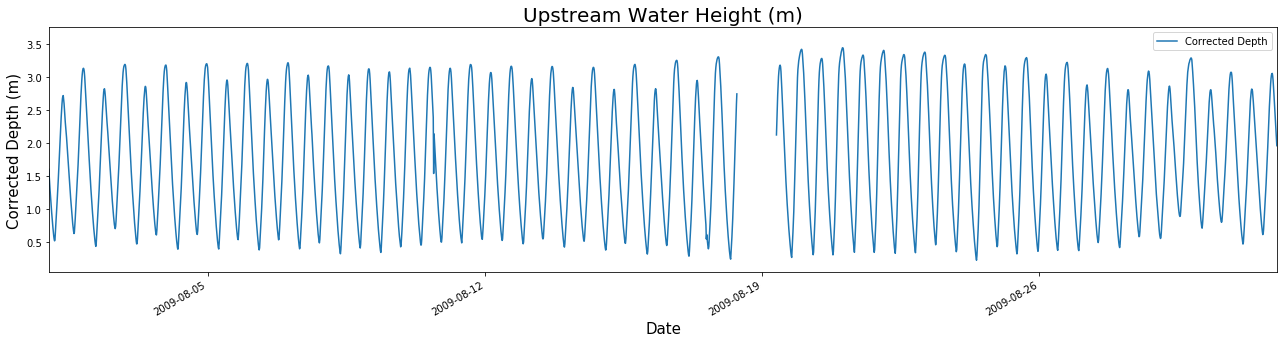

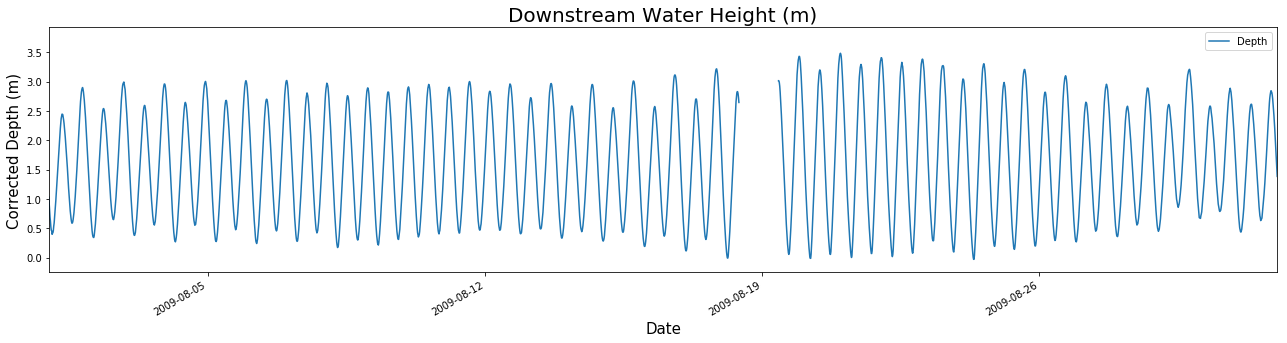

In [10]:
fig = plt.figure()

Upstream_data.plot(x='Date_Time', y='Corrected Depth',
                        figsize=(22, 5))
plt.title('Upstream Water Height (m)', size = 20)
plt.xlabel('Date', size = 15)
plt.ylabel('Corrected Depth (m)', size = 15)
plt.xlim([plot_start_time, plot_end_time])

Downstream_data.plot(x='Date_Time', y='Depth',
                        figsize=(22, 5))
plt.title('Downstream Water Height (m)', size = 20)
plt.xlabel('Date', size = 15)
plt.ylabel('Corrected Depth (m)', size = 15)
plt.xlim([plot_start_time, plot_end_time])

We can also go ahead an plot the:  
* **temperature**
* **salinity**
* **oxygen saturation**

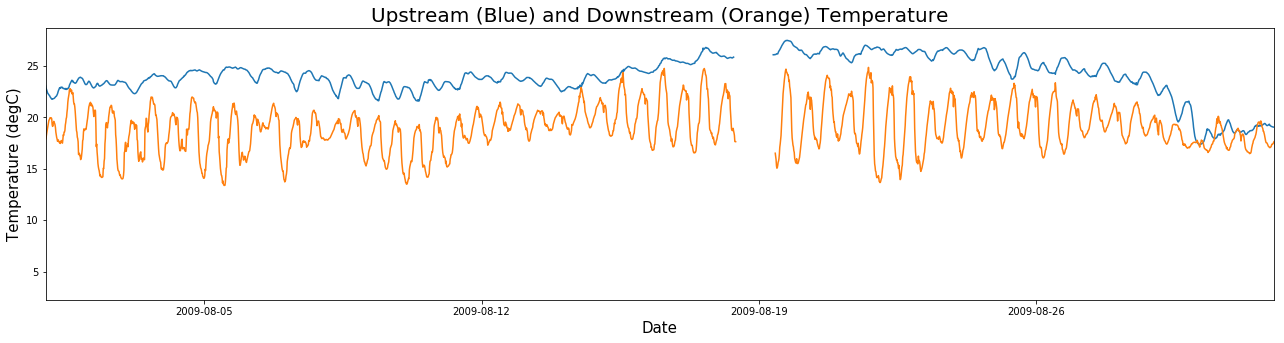

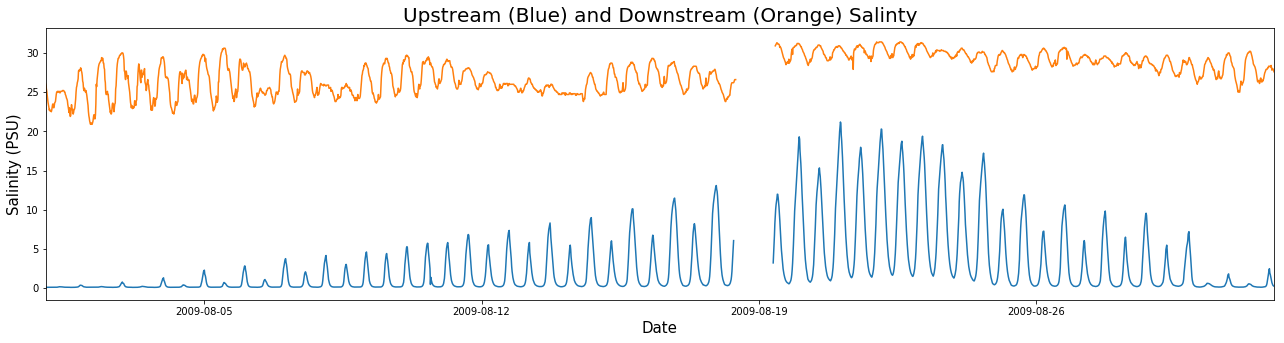

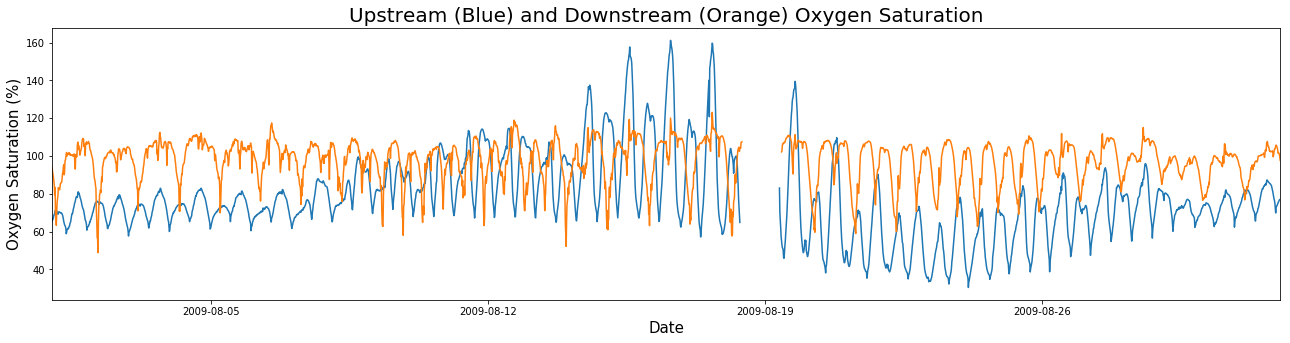

In [11]:
plt.figure(figsize=(22,5))
plt.title('Upstream (Blue) and Downstream (Orange) Temperature', size = 20)
plt.xlabel('Date', size = 15)
plt.ylabel('Temperature (degC)', size = 15)
plt.xlim([plot_start_time, plot_end_time])
plt.plot(Upstream_data[['Date_Time']], Upstream_data[['Temp']],
         Downstream_data[['Date_Time']], Downstream_data[['Temp']])
plt.show()

plt.figure(figsize=(22,5))
plt.title('Upstream (Blue) and Downstream (Orange) Salinty', size = 20)
plt.xlabel('Date', size = 15)
plt.ylabel('Salinity (PSU)', size = 15)
plt.xlim([plot_start_time, plot_end_time])
plt.plot(Upstream_data[['Date_Time']], Upstream_data[['Salinity']],
         Downstream_data[['Date_Time']], Downstream_data[['Salinity']])
plt.show()

plt.figure(figsize=(22,5))
plt.title('Upstream (Blue) and Downstream (Orange) Oxygen Saturation', size = 20)
plt.xlabel('Date', size = 15)
plt.ylabel('Oxygen Saturation (%)', size = 15)
plt.xlim([plot_start_time, plot_end_time])
plt.plot(Upstream_data[['Date_Time']], Upstream_data[['ODO%Local']],
         Downstream_data[['Date_Time']], Downstream_data[['ODO%Local']])
plt.show()

## 3.5. Cleaning the Data
On investigating the data, we can see that there are several periods where data was not collected. In investigating these gaps, we find that these are periods where the sonde is down for maintenance. The data columns corresponding to these gaps in data are filled with the entry "NaN" meaning "Not a Number". Typically, these "NaN"s are identified and removed from the dataset as they can inhibit further analysis.

In [12]:
# Run this code to see the rows where Temperature data was not collected.
# Looking at the comments, we can see that the sonde was down for maintenance during these times.
Upstream_nulls = Upstream_data[pd.isnull(Upstream_data['Temp'])]
Upstream_nulls.head(2)

,Date_Time,Station,Temp,SpCond,Cond,Salinity,ODO%YSI,ODO%Local,ODO Conc,Measured Depth,Depth Offset,Measured BAR,Corrected Depth,Comments
2584,2009-06-08 14:15:31,MiddleRd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015,NaN,YSI 6600 sonde down for maintenance
2585,2009-06-08 14:30:31,MiddleRd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015,NaN,YSI 6600 sonde down for maintenance


We now want to remove these rows from our two datasets, which can be done using the following code:

In [13]:
Upstream_data_nonulls = Upstream_data.dropna(subset=['Temp'])
Downstream_data_nonulls = Downstream_data.dropna(subset=['Temp'])

# Questions for Section 3  
1. Compare the graphs of the data for the water depth, temperature, salinity, and oxygen saturation of the Upstream and Downstream sites. In general, how do these data sets compare? Do the data show evidence of being tidally influenced? If so, please explaiin your reasoning. Can you make sense of this data in terms of tidal motions and the positions of the two stations (Upstream and Downstream)? Please explain.  
2. Try varying the range of data displayed by changing the dates of plot_start_time and plot_end_time. What patterns do you see in water depth, temperature, salinity, and oxygen saturation if you look over a period of a day, week, month, the entire season?

# Instructor Feedback on Section 3  
Question 1:  
Question 2:  

# 4. Analyzing the Data
By plotting our data over various lengths of time, we can start to see different patterns in the data. For example, if we plot over the entire measurement season, we can see that:
* water depth is more or less constant throughout the year.
* temperature increases and then decreases throughout the season.
* salinity varies, but is consistently lower at the upstream site than the downstream site.
* oxygen saturation is generally around 100% for the downstream site and less for the upstream site.

If we plot over a month, we can see that:
* there is varition in the tidal range throughout the month.
* there are possibly related variations in the ranges of temperature, salinity, and oxygen.

If we plot over a single day, we can see:
* a clear semidiurnal tide.
* that the downstream tide signal precedes the upstream tide signal.
* semidiurnal signals in temperature, salinity, and oxygen that may be related to tides.

## 4.1. Signal vs. Noise
The basic process of analyzing data of the same variable spread out over time is called **time series analysis**. Time series analysis is in fact a whole field of study encompasing a variety of techniques of varying mathematical and statistical sophistication. For now, we are only aiming to give you exposure to a few of the basic techniques and concepts of time series analysis. Because it is the most simple, both in terms of process and in terms of analysis, we will be focusing on the **corrected depth** data series. That is, the tidally influenced height of the water.   

To analyze this or any other time series data, we basically want to break up the complex signal into mathematically simpler pieces that, when added back together, closely approximate the original signal. To the extent that we are able to match the original data using these simpler pieces, we claim to have extracted a "**signal**" from the data. To the extent that we are unable to match the original data, we call these remaining differences a "**residual**". If we are unable to make sense of this residual, we may call it "**noise**". The process of data analysis consists of iteratively extracting meaningful and mathematically describable signal from data and iteratively reducing the remaining residual. From a scientific perspective, it is ideal if our extracted signal can also be interpreted in a way that provides **information** or insight into the various processes taking place in te real world. Sometimes a mathematically describable signal is produced by the measurement technique itself rather than the thing in the physical/natural world we want to measure. Such a feature is called an **artifact** of the measurment. Scientists need to be aware of such artifacts to wisely interpret them. Sometimes these artifacts should also be mathematically described such that they can be effectively removed from the data set or selectively ignored. In our case, we have already seen an artifact of the data, namely the gaps in the dataset when the YSI sondes were not functioning.   

## 4.2. Selecting Data
Our first step is to decide what part of the data to investigate. In this case, we will be investigating a specific subset of the data defined by the variables select_start_date and select_end_date. In the bode block below, we effectively select the data and then plot our data selection.

The data selected starts on 2009-06-01 00:00:32
The data selected ends on 2009-06-30 23:45:32
The time span of the selected data is 29 days 23:45:00


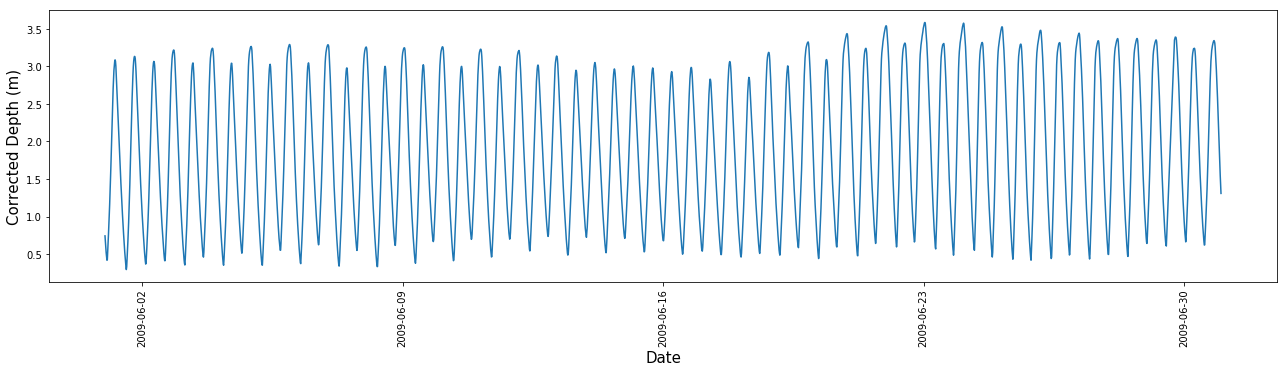

In [14]:
#Identify timespan to investigate.
select_start_date = datetime.date(2009, 6, 1)
select_end_date = datetime.date(2009, 7, 1)

#Copy data so as not to mess with original
Upstream_data_nonulls_copy = Upstream_data_nonulls
Upstream_data_nonulls_copy = Upstream_data_nonulls_copy.set_index(['Date_Time'])

#Select Data in designated time span
Upstream_data_select = Upstream_data_nonulls_copy.loc[select_start_date:select_end_date]
Upstream_data_firstdate=Upstream_data_select.first_valid_index()
Upstream_data_lastdate=Upstream_data_select.last_valid_index()
Upstream_data_timespan = Upstream_data_lastdate-Upstream_data_firstdate
#Print the selected time span
print('The data selected starts on ' + str(Upstream_data_firstdate))
print('The data selected ends on ' + str(Upstream_data_lastdate))
print('The time span of the selected data is ' + str(Upstream_data_timespan))

#Plot data for the selected time span
plt.figure(figsize=(22,5))
plt.plot(Upstream_data_select.index.values, Upstream_data_select['Corrected Depth'])
plt.xticks(rotation=90)
plt.xlabel('Date', size = 15)
plt.ylabel('Corrected Depth (m)', size = 15)
plt.show()

## 4.3. Normalizing Data
The next step is to remove the average value of the data and to divide the remaining values by the standard deviation. This process is called "normalizing" the data and will help with further analysis. Importantly, we also want to keep and store this information such that we can reconstruct the data set if neccesary.  

Visual inspection of the  **corrected depth** data series shows that the average corrected depth for the Upstream site is between 1.5 m and 2 m. The average corrected depth for the Downstream site is around 1.5 m. These averages can be rigorously calculated, stored, and then removed. Removing these averages is important because visual inspection of the data series strongly suggests the presense of a periodic or wave-like signal composed of a few waves of different frequencies. However, we will be unable to effectively analyze these wave-like signals unless we center the data around 0 by subtracting the mean. This is because the sine functions we want to break the data into are also centered around 0.  

Dividing by the standard deviation allows up to compare data sets of vastly different scales. Because we will not be comparing different types of data in this problem set, this process of normalizing is not strictly necessary in the context of this problem set. However, it is a common step in data analysis and would be neccessary if we were to conduct an in-depth analysis of this dataset.  

In [15]:
#Make a copy of the dataset so we don't mess up the original
Upstream_data_select_copy = Upstream_data_select

In [16]:
#Identify data types in the dataset
Upstream_data_select_copy.dtypes

Station             object
Temp               float64
SpCond             float64
Cond               float64
Salinity           float64
ODO%YSI            float64
ODO%Local          float64
ODO Conc           float64
Measured Depth     float64
Depth Offset       float64
Measured BAR         int64
Corrected Depth    float64
Comments            object
dtype: object

In [17]:
#Calculate and store the means
Upstream_data_mean = Upstream_data_select_copy.mean(0)
Upstream_data_mean

Temp                 18.499343
SpCond                6.102467
Cond                  5.333350
Salinity              3.488269
ODO%YSI              81.120365
ODO%Local            80.929108
ODO Conc              7.454154
Measured Depth        1.864624
Depth Offset          0.020887
Measured BAR       1011.574438
Corrected Depth       1.902651
dtype: float64

In [18]:
#Calculate and store the standard deviations
Upstream_data_std = Upstream_data_select_copy.std(0)
Upstream_data_std

Temp                0.968230
SpCond              6.582382
Cond                5.733083
Salinity            3.960832
ODO%YSI            18.008157
ODO%Local          17.825218
ODO Conc            1.676643
Measured Depth      0.927424
Depth Offset        0.035617
Measured BAR        6.253463
Corrected Depth     0.931505
dtype: float64

In [19]:
#identify columns containing text.
cols_with_text = Upstream_data_select_copy.select_dtypes(include=['object']).columns.tolist()
#identify columns containing numbers.
cols_with_numbers = Upstream_data_select_copy.select_dtypes(exclude=['object']).columns.tolist()

#Setting up Dataframe for normalized data
Upstream_data_norms = pd.DataFrame(columns = list(Upstream_data_select_copy.columns))

for col in cols_with_text:
    Upstream_data_norms[col] = Upstream_data_select_copy[col]

# normalize data by subtracting mean and dividing by standard deviation
for col in cols_with_numbers:
    Upstream_data_norms[col] = (Upstream_data_select_copy[col]-Upstream_data_mean[col])/(Upstream_data_std[col])

Upstream_data_norms.head()

,Station,Temp,SpCond,Cond,Salinity,ODO%YSI,ODO%Local,ODO Conc,Measured Depth,Depth Offset,Measured BAR,Corrected Depth,Comments
Date_Time,,,,,,,,,,,,,
2009-06-01 00:00:32,MiddleRd,-1.786087,-0.712275,-0.722360,-0.701436,-0.328760,-0.349455,-0.103871,-1.301049,1.704612,0.227964,-1.245995,NaN
2009-06-01 00:15:32,MiddleRd,-1.755103,-0.749799,-0.758641,-0.734257,-0.373185,-0.399945,-0.157549,-1.384075,1.704612,0.227964,-1.328657,NaN
2009-06-01 00:30:32,MiddleRd,-1.765431,-0.764232,-0.772595,-0.746881,-0.400950,-0.427995,-0.181406,-1.460631,1.704612,0.227964,-1.404878,NaN
2009-06-01 00:45:32,MiddleRd,-1.786087,-0.773651,-0.781665,-0.754455,-0.434268,-0.456045,-0.211228,-1.531796,1.704612,0.387875,-1.486466,NaN
2009-06-01 01:00:32,MiddleRd,-1.806743,-0.783526,-0.791433,-0.762029,-0.434268,-0.456045,-0.205264,-1.592179,1.704612,0.387875,-1.546584,NaN


In [20]:
Upstream_data_norms.mean(0)

Temp              -6.308867e-14
SpCond             1.535094e-15
Cond              -4.413643e-15
Salinity           1.756788e-15
ODO%YSI            1.881169e-14
ODO%Local          4.160101e-15
ODO Conc           6.923379e-15
Measured Depth    -1.798070e-15
Depth Offset      -1.980173e-14
Measured BAR       5.413351e-15
Corrected Depth   -2.453913e-15
dtype: float64

In [21]:
Upstream_data_norms.std(0)

Temp               1.0
SpCond             1.0
Cond               1.0
Salinity           1.0
ODO%YSI            1.0
ODO%Local          1.0
ODO Conc           1.0
Measured Depth     1.0
Depth Offset       1.0
Measured BAR       1.0
Corrected Depth    1.0
dtype: float64

# Questions for Section 4
Question 1: In your own words, please explain what we did to our data in Section 4. (Selecting and Normalizing)

# Instructor Feedback on Section 4

# 5. Waves and frequency analysis
A visual analysis of the Tides data in Section 3.4. shows that all of these data exhibit some kind of **complex wave form**. This should not be surprising beacause, as highlighted in Section 2., **tides are waves** and tidally-influenced, cyclical, or seasonal processes are also likely to resemble or be composed of waves. In Section 1.4., we learned about **wave interference** and how complex wave forms can be built up by adding together simple sine waves of various amplitudes, frequencies, and offsets. 

Now that we've cleaned and normalized our dataset we can think about trying to identify some of the wave forms in our data set using **Fourier Analysis**, which is basically the opposite of **wave interference**. Instead of adding together simple waves to make a more complex wave form, we will be trying to break up a complex wave form into simpler waves of specified amplitudes, frequencies, and offsets. Conveniently, there are a number of useful Fourier Analysis tools found in the library *scipy*, which we imported at the beginning of this problem set.

For simplicity, we will be focusing on the **water depth data**. 

## 5.1. Fourier (frequency) analysis
The basic premise of Fourier analysis is that a function that can be desribed as function of time (or space) can also be described as a function of wave frequencies (or wave lengths) and amplitudes. By conducting a Fourier Analysis, we can plot the data as a function of various frequencies and the amplitudes, or "power" associated with each frequency. We can then identify the dominant frequencies or cyclical patterns in our dataset. This type of analysis is especially useful for analysis of periodic, cyclical, or wave-like phenomena such as tides.

Text(0,0.5,'Power Spectral Density')

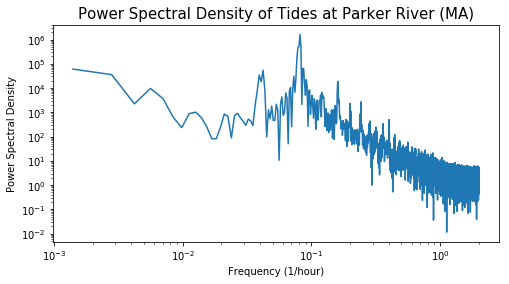

In [22]:
#Conduct a fast Fourior transform (fft) on the normalized dataset
Upstream_depth_fft = sp.fftpack.fft(Upstream_data_norms['Corrected Depth'])

#Calculate the power spectral density (Variance or "Power" associated with each frequency)
Upstream_depth_psd = np.abs(Upstream_depth_fft) ** 2

#Identify the frequencies and rescale to 1/hr
# Data was collected every 15 minutes, so multiply by 0.25
fftfreq = sp.fftpack.fftfreq(len(Upstream_depth_psd), 0.25)

#Select only positive frequencies
i = fftfreq > 0

# Plot Power Spectral Density on a log vs. log plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], Upstream_depth_psd[i])
plt.title('Power Spectral Density of Tides at Parker River (MA)', size = 15)
ax.set_xlabel('Frequency (1/hour)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Power Spectral Density')

## 5.2. Fourier Analysis Result
As you can see from the above plot of the power spectral density, there are several dominant frequencies apparent in the data. The highest peak is centered around 8×10<sup>-1</sup>, which (we will find out) is about 12.4 hours. To the left, there is another peak at about 24 hours. Actually, this is a double peak with one peak at 24 hours and another peak at 25.7 hours. To the right of the main peak, there are several additional peaks associated with small-number multiples of the main frequency, called "**harmonics**". Because the dominant wave period is around 12 hours, these harmonic frequencies are associated with wave periods of 6 hours and 4 hours.  

From the plot, it might be difficult to tell exactly what the dominant frequencies are and what they translate to in terms of wave periods. To help with our interpretation, we will:  
* compile a table of the frequencies and associated powers
* sort this table in order of decreasing power
* examine the frequencies at the top of the list

In [23]:
#Tabulate Results of the Dominant Frequencies
fft_results = pd.DataFrame({'Frequency':fftfreq[i], 
                              'Power':Upstream_depth_psd[i]})
fft_results['Period (hr)']=fft_results['Frequency']**-1
fft_results_sorted = fft_results.sort_values(by=['Power'], ascending=False)
fft_results_sorted.head(16)

,Frequency,Power,Period (hr)
57,0.081461,1.622864e+06,12.275862
58,0.082865,5.502591e+05,12.067797
56,0.080056,4.979691e+05,12.491228
55,0.078652,4.817534e+05,12.714286
54,0.077247,1.920358e+05,12.945455
60,0.085674,6.557840e+04,11.672131
61,0.087079,6.330174e+04,11.483871
0,0.001404,6.044001e+04,712.000000
29,0.042135,5.446877e+04,23.733333
1,0.002809,3.562502e+04,356.000000


As you can see from the above table, there is a lot of power centered around a wave period of 12.4 hours. Looking down the list, there is also a peak at 24.0 hours and at 25.7 hours. As mentioned, there are additionally some harmonic peaks centered around 6 hours.  

While our analysis gives us many frequencies associated with a wave period of about 12.4 hours, a visual analysis of the Power Spectral Density Plot shows that there is essentially one main frequency associated with a wave period of 12.4 hours. The identification of a number of adjascent frequencies represent an artifact of the analysis. There are a variety of signal processing techniques that might be used to clean up this data and more clearly identify the dominant frequency. However, these techniques are beyond the scope of this class. It is enough if you can: 
* see how a complex signal can be composed of sine waves of different frequencies and amplitudes
* see that the tidal signal can be broken down into composite sine waves using a Fourier Transform
* see that the dominant wave periods associated with tides are roughly 12.4 hours, 24.0 hours, and 25.7 hours.

## 5.3. Reproducing the Signal
Taking the results of the Fourier Analysis, we can attempt to reproduce the original signal. In this case, we will be reproducting the signal using a selection of frequencies corresponding to wave periods in the range 11.8 to 25 hours. We will then plot the reconstucted signal on top of the original as well as the residuals.

In [24]:
#Select Frequency Range
Upstream_depth_fft_bis = Upstream_depth_fft.copy()
Upstream_depth_fft_bis[np.abs(fftfreq) > 0.85] = 0
Upstream_depth_fft_bis[np.abs(fftfreq) < 0.03] = 0

Text(0,0.5,'Error in Corrected Depth (m)')

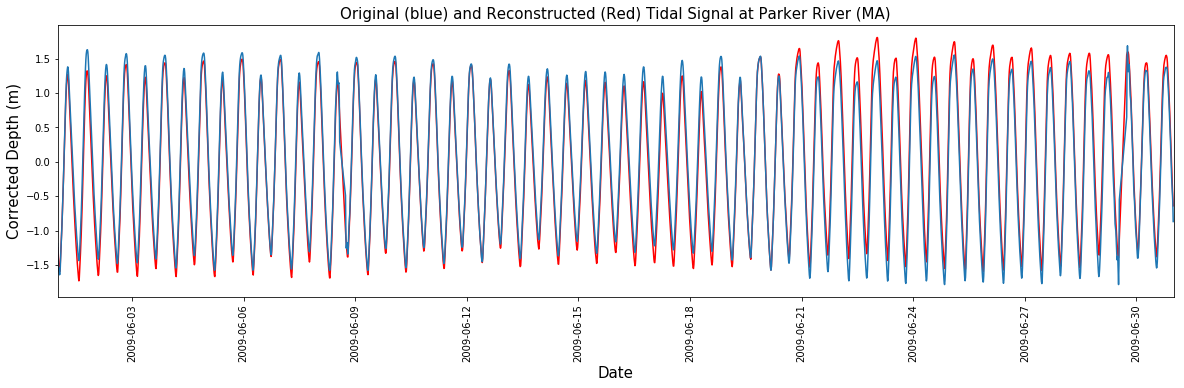

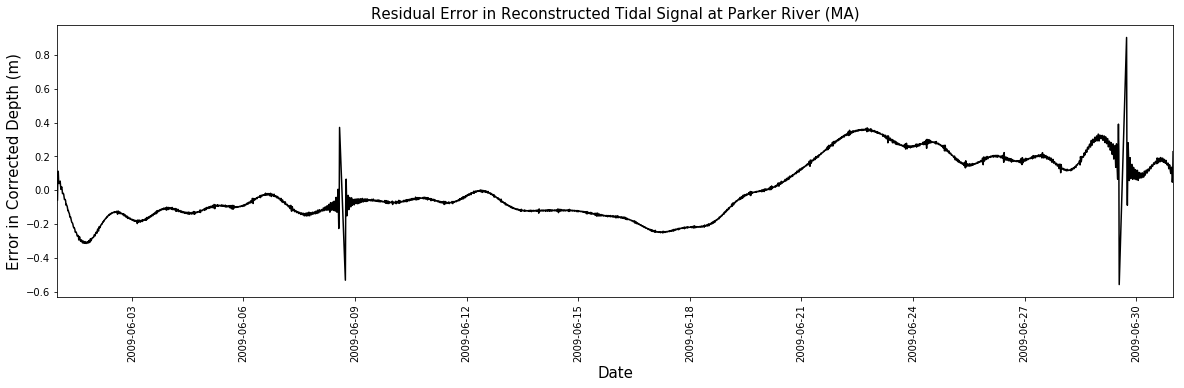

In [25]:
Upstream_depth_slow = np.real(sp.fftpack.ifft(Upstream_depth_fft_bis))
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot_date(Upstream_data_select.index.values, Upstream_data_norms['Corrected Depth'],'r-')
ax.plot_date(Upstream_data_select.index.values, Upstream_depth_slow, '-')
ax.set_xlim(select_start_date,
            select_end_date)
plt.xticks(rotation=90)
plt.title('Original (blue) and Reconstructed (Red) Tidal Signal at Parker River (MA)', size = 15)
plt.xlabel('Date', size = 15)
plt.ylabel('Corrected Depth (m)', size = 15)

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot_date(Upstream_data_select.index.values, Upstream_data_norms['Corrected Depth']-Upstream_depth_slow,'k-')
ax.set_xlim(select_start_date,
            select_end_date)
plt.xticks(rotation=90)
plt.title('Residual Error in Reconstructed Tidal Signal at Parker River (MA)', size = 15)
plt.xlabel('Date', size = 15)
plt.ylabel('Error in Corrected Depth (m)', size = 15)

# Questions on Section 5
Question 1: What leads to variations in the tidal range throughout the month?  
Question 2: How are these causes reflected in the dominant wave periods associated with tides?

# Instructor Feedback on Section 5